In [21]:
# Parameters to set to run this notebook

# Constant current injections will be made to these neurons.
stimulus = {
  "AVBL": 2.3,
  "AVBR": 2.3,
  "PLML": 1.4,
  "PLMR": 1.4
}

# Neurons to plot membrane potentials for.
neurons_to_observe = ["PLML", "PLMR", "IL2L"]

# How many timesteps to run simulation for.
simul_time = 1000


/home/stephen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


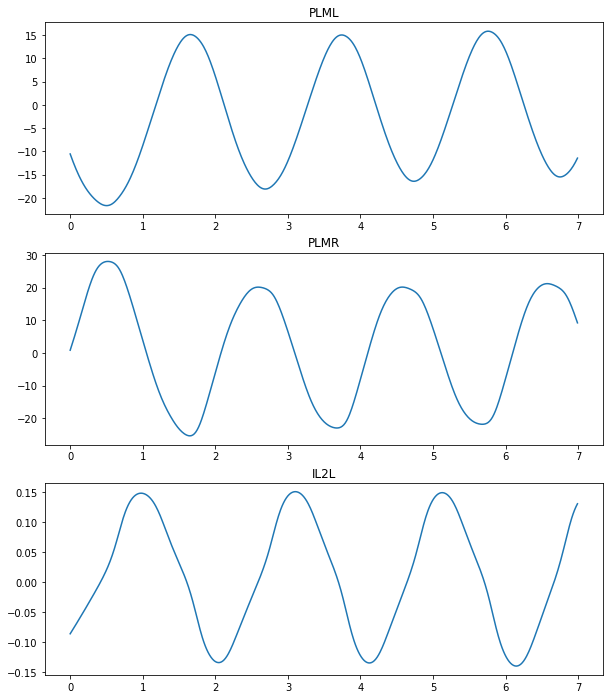

In [22]:
import project_path
from model.neural_model import NeuralModel
from model.neuron_metadata import NeuronMetadataCollection
from model.data_accessor import get_data_file_abs_path
from util.plot_util import *

neuron_metadata_collection = NeuronMetadataCollection.load_from_chem_json(get_data_file_abs_path('chem.json'))
model = NeuralModel(neuron_metadata_collection)
N = neuron_metadata_collection.get_size()

# If you want a fixed-seed run.
np.random.seed(0)
model.init_conds = 10**(-4)*np.random.normal(0, 0.94, 2*N)

for (neuron, current) in stimulus.items():
  model.set_current_injection(neuron, current)
model.init()
(v_mat, s_mat, v_normalized_mat) = model.run(simul_time)

# The oscillatory dynamic doesn't stabilize until about dt*300 onwards.
# Also, interactome analysis is done after the first 50 timesteps.
truncated_potentials = v_normalized_mat[300:,:]

fig = plot_potentials(neurons_to_observe, truncated_potentials, neuron_metadata_collection)
fig.show()